<h2>Image Enhancement</h2>
<ul>
    <li>Artus, Neil</li>
<ul>


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import wiener 

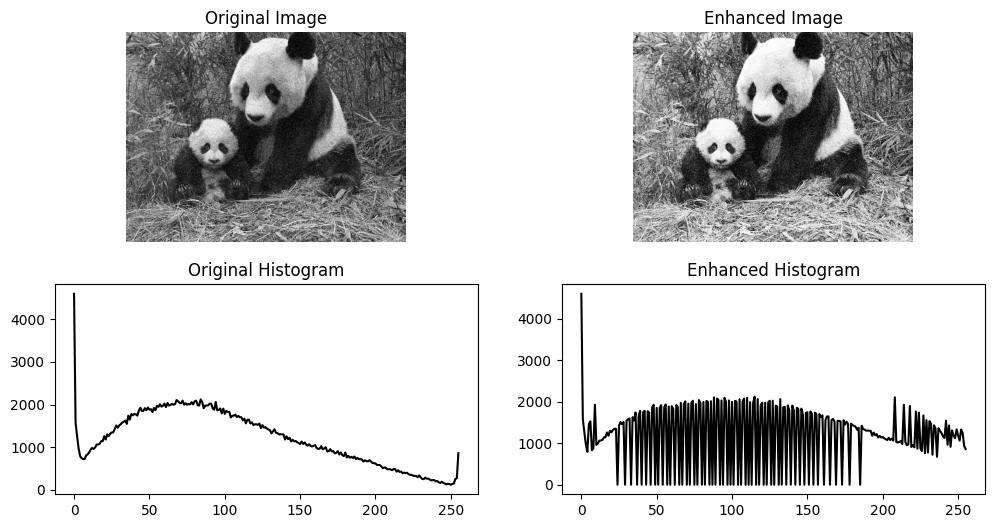

In [3]:
def histogram_equalization(image_path):
 # Read the image in grayscale
 img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
 if img is None:
    print("Error: Could not read image.")
    return

 # Apply histogram equalization
 enhanced_img = cv2.equalizeHist(img)

 # Compute histograms
 original_hist = cv2.calcHist([img], [0], None, [256], [0, 256])
 enhanced_hist = cv2.calcHist([enhanced_img], [0], None, [256], [0, 256])

 # Display images and histograms
 plt.figure(figsize=(12, 6))

 plt.subplot(2, 2, 1)
 plt.imshow(img, cmap='gray')
 plt.title('Original Image')
 plt.axis('off')

 plt.subplot(2, 2, 2)
 plt.imshow(enhanced_img, cmap='gray')
 plt.title('Enhanced Image')
 plt.axis('off')

 plt.subplot(2, 2, 3)
 plt.plot(original_hist, color='black')
 plt.title('Original Histogram')

 plt.subplot(2, 2, 4)
 plt.plot(enhanced_hist, color='black')
 plt.title('Enhanced Histogram')

 plt.show()


histogram_equalization('asd.jpg')


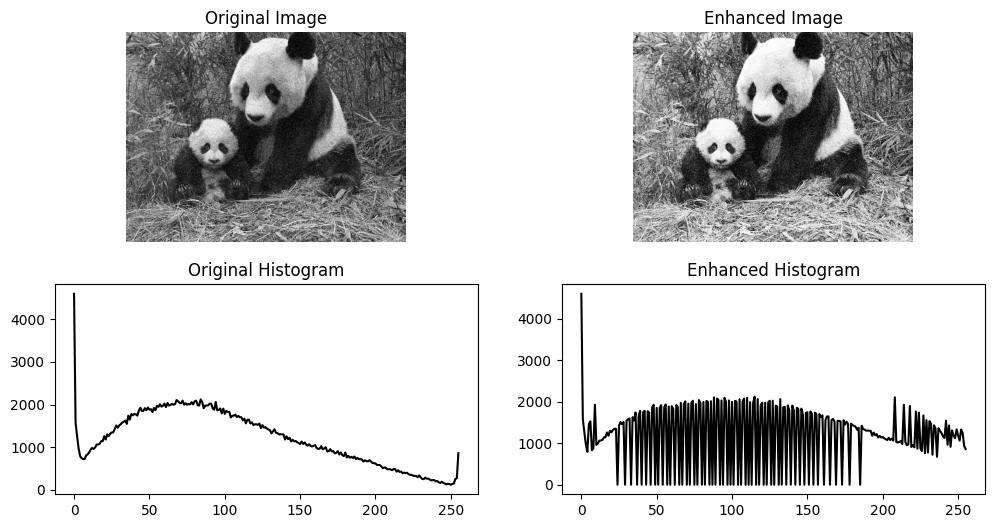

In [4]:
def histogram_equalization(image_path):
 # Read the image in grayscale
 img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
 if img is None:
    print("Error: Could not read image.")
    return

 # Apply histogram equalization
 enhanced_img = cv2.equalizeHist(img)

 # Compute histograms
 original_hist = cv2.calcHist([img], [0], None, [256], [0, 256])
 enhanced_hist = cv2.calcHist([enhanced_img], [0], None, [256], [0, 256])

 # Display images and histograms
 plt.figure(figsize=(12, 6))

 plt.subplot(2, 2, 1)
 plt.imshow(img, cmap='gray')
 plt.title('Original Image')
 plt.axis('off')

 plt.subplot(2, 2, 2)
 plt.imshow(enhanced_img, cmap='gray')
 plt.title('Enhanced Image')
 plt.axis('off')

 plt.subplot(2, 2, 3)
 plt.plot(original_hist, color='black')
 plt.title('Original Histogram')

 plt.subplot(2, 2, 4)
 plt.plot(enhanced_hist, color='black')
 plt.title('Enhanced Histogram')

 plt.show()

histogram_equalization('asd.jpg')

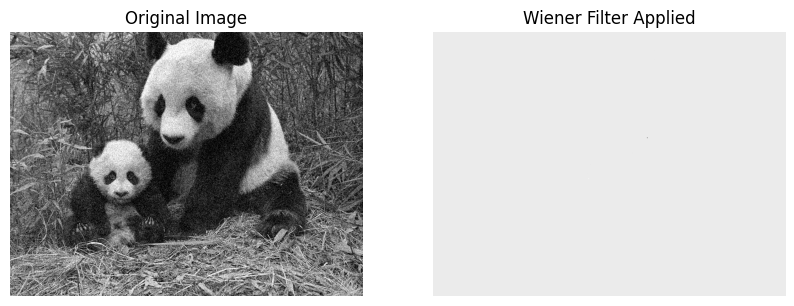

In [5]:
def adaptive_wiener_filter(image_path):
 # Read the image in grayscale
 img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
 if img is None:
    print("Error: Could not read image.")
    return
 
 #Lines of code commented with "[+]" reflects added lines of code. The rest of the code remains unchanged.

 wiener_filtered = wiener(img, (5,5)) 

 # Display original and Wiener filtered images
 plt.figure(figsize=(10, 10))

 plt.subplot(1, 2, 1)
 plt.imshow(img, cmap='gray')
 plt.title('Original Image')
 plt.axis('off')

 plt.subplot(1, 2, 2)
 plt.imshow(wiener_filtered, cmap='gray')
 plt.title('Wiener Filter Applied')
 plt.axis('off')

 plt.show()

adaptive_wiener_filter('asd.jpg')

Original Min: 0, Max: 255, Mean: 97.99819661458334
Wiener uint8 | Min: -2165478.639187352, Max: 5630268.661773638, Mean: 110.8952306899751
Wiener float64 | Min: 0.00012196861626279087, Max: 252.22222222222211, Mean: 97.73564154999687


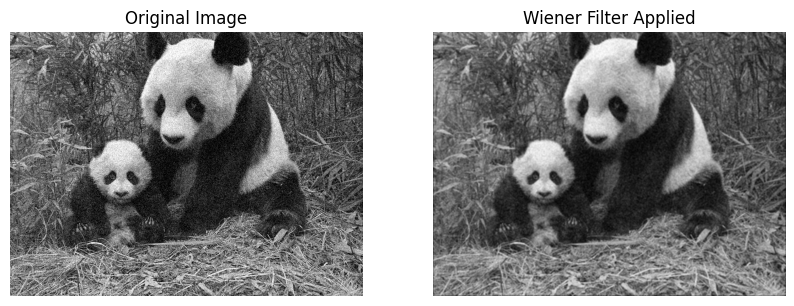

In [6]:
def adaptive_wiener_filter(image_path):
 # Read the image in grayscale
 img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
 if img is None:
    print("Error: Could not read image.")
    return
 
 #Lines of code commented with "[+]" reflects added lines of code. The rest of the code remains unchanged.

 # Apply Wiener filter
 print(f"Original Min: {img.min()}, Max: {img.max()}, Mean: {img.mean()}") # [+]
 wiener_filtered = wiener(img, (3,3)) 
 print(f"Wiener uint8 | Min: {wiener_filtered.min()}, Max: {wiener_filtered.max()}, Mean: {wiener_filtered.mean()}")# [+]
 wiener_filtered = wiener(img, (3,3), 0.001) # [+]
 print(f"Wiener float64 | Min: {wiener_filtered.min()}, Max: {wiener_filtered.max()}, Mean: {wiener_filtered.mean()}") # [+]

 # Display original and Wiener filtered images
 plt.figure(figsize=(10, 10))

 plt.subplot(1, 2, 1)
 plt.imshow(img, cmap='gray')
 plt.title('Original Image')
 plt.axis('off')

 plt.subplot(1, 2, 2)
 plt.imshow(wiener_filtered, cmap='gray')
 plt.title('Wiener Filter Applied')
 plt.axis('off')

 plt.show()
 cv2.imwrite('wiener.jpg',wiener_filtered)

adaptive_wiener_filter('asd.jpg')

<h2>Answers to Reflection Questions</h2>

<ol>
    <li>After commenting out the function calls and replacing the placeholder file names for the image, there were no syntax errors present. However, there is a logic error in section 3. The imread function outputs the pixel values of the image as an n-dimensional array. However, when dealing with images that have a really low sampled noise variance (close to 0), a problem arises. The Wiener filter formula divides by the calulated noise based on local averages of the specified kernel size (3,3) - a any number divided by very small noise when divided by a squared, small floating point value leads to a very large number (example 212/0.000012). When matplotlib attempts to plot this, it expects values of 0-255, which is typical for an RGB color representation. The overly-large maximum pixel is scaled to 255, which would be black. Specifying a specific noise power fixes this problem. Also, I replaced the kernel size because 5,5 is a bit big and leads to a blurry image.  </li>
    <li>An histogram is a graphical representation of the distribution in a digital image. It plots the number of pixels for each tonal value (0-255). It allows us to understand the image's brightness, contrast, and intensity distribution. A histogram skewed to the left indicates a dark image; skewed to the right indicates a bright image. A histogram covering a narrow range of intensity values indicates low contrast; a wide, well-distributed histogram suggests higher contrast. These trends are apparent in Tasks 1 and 2. This is useful for professionals who work in photography, editing, medical imaging, and quality control wherein "looking" at the image is not good enough for finding flaws - you need qualitative proof.</li>
    <li>The Wiener filter is used for denoising and deblurring. It works like nearest neighbors wherein it bases its calculation on a local sample base on kernel size. It attempts to estimate the original image by calculating variance of both the original image and the noise. It tries to minimize the mean square error between the estimated image and the original image. Its effectiveness depends on having reasonable estimates of these statistics, as seen in the original code wherin it fails due to bad automatic estimation. Tasks 1 and 2 use a contrast enhancement filter. It doesn't explicitly filter out noise. It modifies the image's intensity values based on their frequency (histogram) to enable a more even distribution od intensities. Unlike the Wiener, it is a global calculation and can amplify noise in some cases (no localized kernel math).</li>
</ol>